In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import io

In [ ]:
from google.colab import files

uploaded = files.upload()

btc = pd.read_csv('Cleaned_Price.csv')

In [ ]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

btc.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,,,
2014-09-17,0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9
2014-09-18,1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9
2014-09-19,2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9
2014-09-20,3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9
2014-09-21,4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9


## Plotting the Price Trend of BTC USD Pair's Closing Price

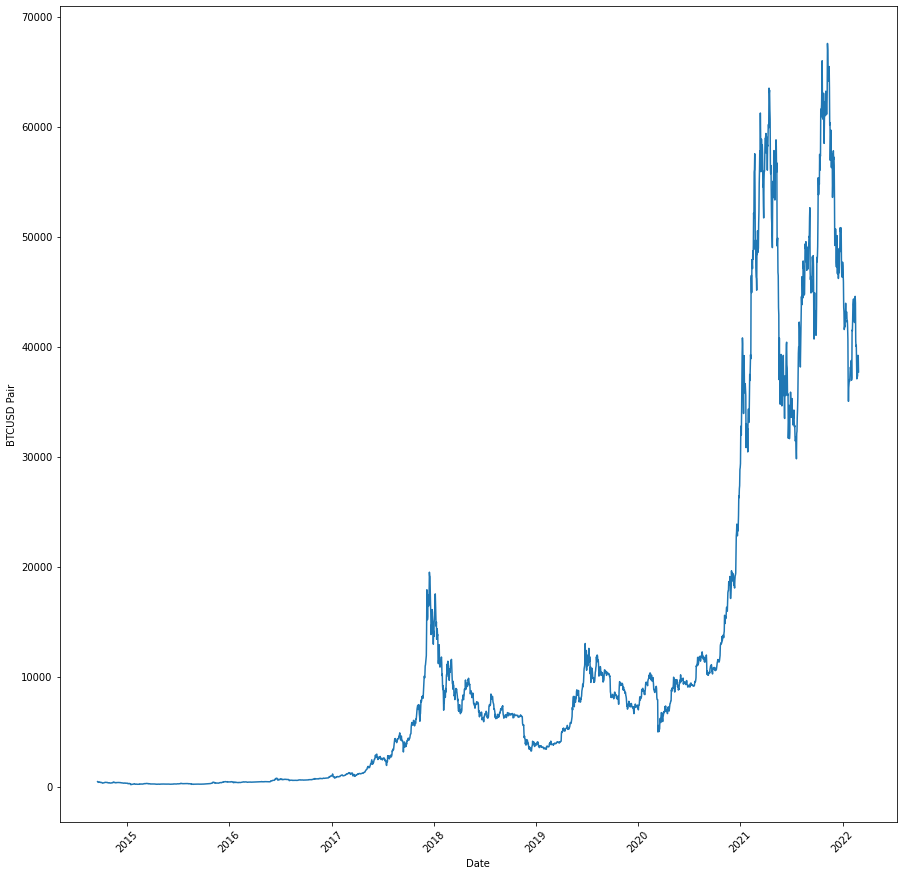

In [ ]:
plt.figure(figsize=(15,15))
plt.ylabel('BTCUSD Pair')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['Close'], )

In [ ]:
training = btc[btc.index < pd.to_datetime("2021-06-30", format='%Y-%m-%d')]
training = training.iloc[: , 1:]
testing = btc[btc.index >= pd.to_datetime("2021-07-01", format='%Y-%m-%d')]
testing = testing.iloc[: , 1:]

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.,
        737791., 738156.]), <a list of 9 Text major ticklabel objects>)

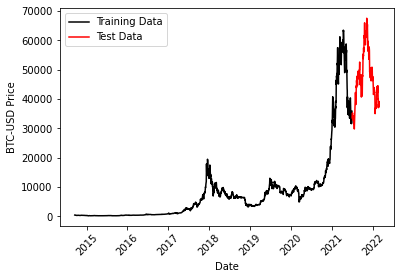

In [ ]:
plt.plot(training.Close, color = "black", label = "Training Data")
plt.plot(testing.Close, color = "red", label = "Test Data")
plt.ylabel('BTC-USD Price')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)

In [ ]:
model = ARIMA(training['Close'], order=(3, 2, 1))
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(242, alpha=0.01)

# Make as pandas series
fc_series = pd.Series(fc, index=testing['Close'].index)
lower_series = pd.Series(conf[:, 0], index=testing['Close'].index)
upper_series = pd.Series(conf[:, 1], index=testing['Close'].index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 2476
Model:                 ARIMA(3, 2, 1)   Log Likelihood              -19516.276
Method:                       css-mle   S.D. of innovations            640.134
Date:                Tue, 29 Mar 2022   AIC                          39044.553
Time:                        01:35:04   BIC                          39079.439
Sample:                    09-19-2014   HQIC                         39057.224
                         - 06-29-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0202      0.019      1.071      0.284      -0.017       0.057
ar.L1.D2.Close    -0.0684      0.020     -3.404      0.001      -0.108      -0.029
ar.L2.D2.Close     0.0740      0.020

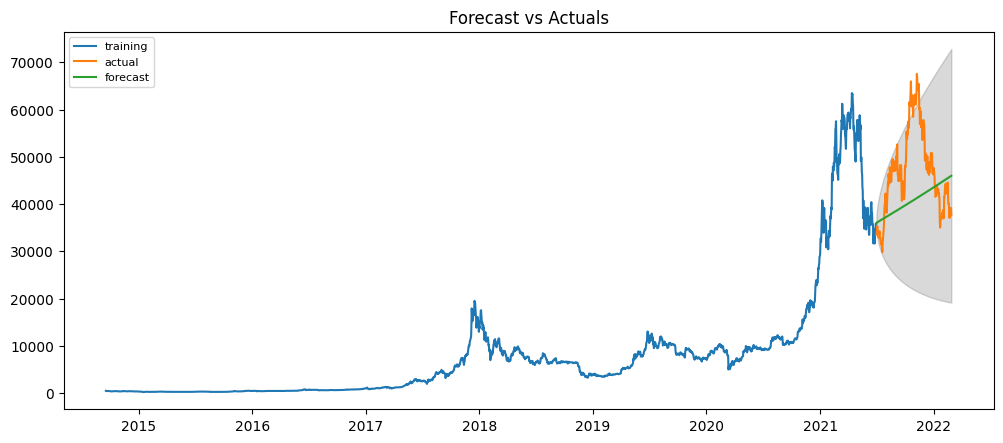

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(training['Close'], label='training')
plt.plot(testing['Close'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()